# Scatter Plots

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Graded Confidence Intervals

In [2]:
# Import data
data0 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/ScatterCI.dta")
# retreive features
features = ['cons_pae_m_sine', 'cons_pae_sd_sine']
data0 = data0[features][(data0[features[0]] < 140) & (data0[features[1]] < 30)]
data01 = data0.sample(100)

c:\python38\lib\site-packages\pandas\io\stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


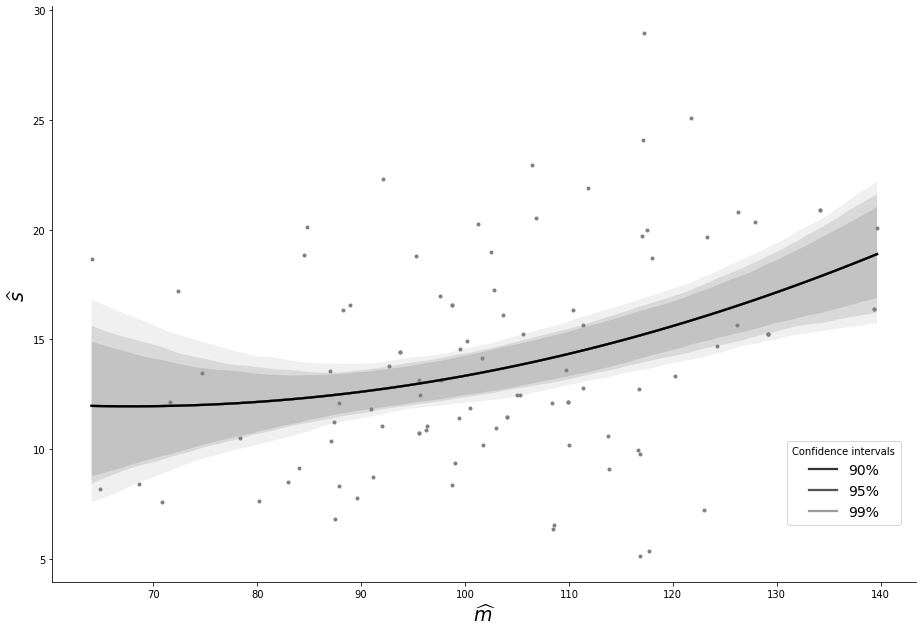

In [3]:

fig = plt.figure(figsize=(12, 8), facecolor = "white")
ax = fig.add_axes([.1, 1, 1, 1])

omit = ['right', 'top']

sns.regplot(features[0], features[1], data = data01, ci = 90, color = "#353433", order = 2, label = "90%", scatter = False)
sns.regplot(features[0], features[1], data = data01, ci = 95, color = "#545454", order = 2, label = "95%", scatter = False)
sns.regplot(features[0], features[1], data = data01, ci = 99, color = "#9b9b9b", order = 2, label = "99%", scatter = False)
sns.regplot(features[0], features[1], data = data01, ci = 0, color = "black", order = 2, label = "", scatter = False)

ax.scatter(features[0], features[1], data = data01, s = 9, color = "#808080", label = "")

ax.legend(title = "Confidence intervals", loc = (.85, .1), prop={'size': 14})
ax.spines[omit].set_visible(False)
ax.set_ylabel(r'$\widehat{s}$', size = 19)
ax.set_xlabel(r'$\widehat{m}$', size = 19)
plt.savefig("../figs/03scatter_01.png")

## With Fitted Line 

In [4]:
# import Data
data1 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/ScatterFittedLine.dta")
data1.head(3)

,hhid,post,area_cult,revenue
0,15025.0,0.0,11.071095,3.226190
1,19048.0,1.0,2.471546,0.526227
2,14495.0,0.0,1.132170,0.332619


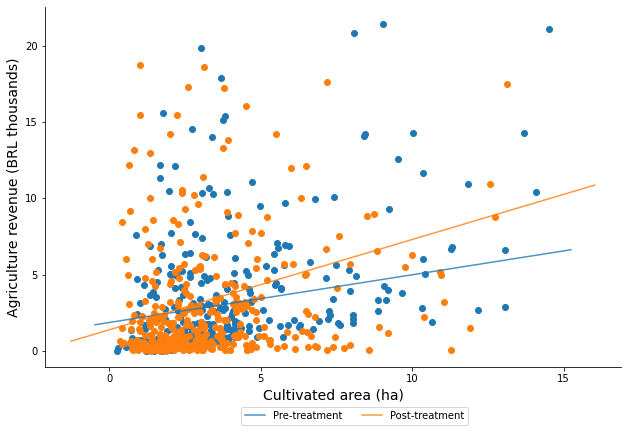

In [5]:
# Plots elemente
fig = plt.figure(figsize=(8, 5), facecolor="white")
ax = fig.add_axes([.1, 1, 1, 1])

## Simple line function
def abline(slope, intercept, lbl = "None"):
    """Plot a line from slope and intercept"""
    # Actual features
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    # abline plot
    plt.plot(x_vals, y_vals, '-',  alpha = .8, label = lbl)

## Data subsets
data10 = data1[data1.post == 0]
data11 = data1[data1.post == 1]

## slope and intercept
m0, b0 = np.polyfit(data10.area_cult, data10.revenue, 1)
m1, b1 = np.polyfit(data11.area_cult, data11.revenue, 1)

## legend labels
lbs = ["Post-treatment", "Pre-treatment"]
omit = ["right", "top"]

## Scatter
ax.scatter('area_cult', 'revenue', data = data1[data1.post == 1], label = "")
ax.scatter('area_cult', 'revenue', data = data1[data1.post == 0], label = "")
## Linear 
abline(m0, b0, lbs[1])
abline(m1, b1, lbs[0])
## aesthetic
ax.legend(ncol = 2, loc = (.34, -.16))
ax.set_xticks(np.arange(0, 16, 5))
ax.set_yticks(np.arange(0, 21, 5))
ax.set_xlabel("Cultivated area (ha)", size = 14)
ax.set_ylabel("Agriculture revenue (BRL thousands)", size = 14)
ax.spines[omit].set_visible(False)
# plt.savefig("../figs/03scatter_02.png", bbox_inches='tight', dpi = 400)

## With enphasized labels

In [6]:
## Import data
data3 = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/python_visual_library/main/data/wd_indicator.csv")
features = ['iso3c', '1980', '2012']
data3 = data3[features]
high_lights = data3[data3['iso3c'].str.contains('USA|CHN|BRA|RWA')]
high_lights

,iso3c,1980,2012
73,BRA,6500.387806,9056.580438
88,CHN,430.854649,6591.650851
209,RWA,430.763833,668.828598
253,USA,31161.930725,54213.459552


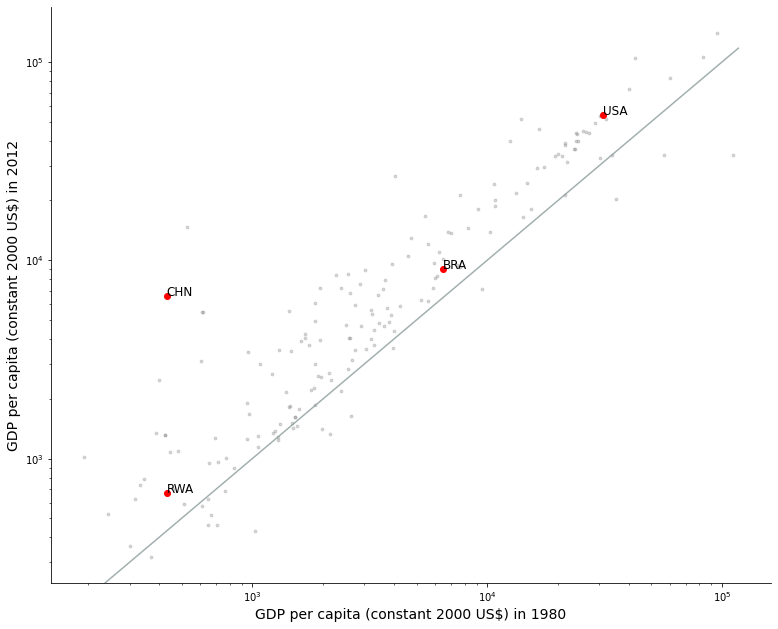

In [7]:
# Plots elements
fig = plt.figure(figsize = (10, 8), facecolor = "white")
ax = fig.add_axes([.1, 1, 1, 1])
omit = ['right', 'top']

# same function
def abline(slope, intercept, colors = "#8b9b9b"):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    # line plot
    plt.plot(x_vals, y_vals, '-', color = colors, alpha = .8)
    
# scatter plots
ax.scatter("1980", "2012", data = data3, color = "#808080", alpha = .3, s = 8)
# hightlight scatter
ax.scatter("1980", "2012", data = high_lights, color = "red")
# Labels
for i in range(4):
    aux_ref = high_lights.iloc[i]
    x_ref = aux_ref["1980"]
    y_ref = aux_ref["2012"]
    ax.text(x_ref, y_ref, aux_ref['iso3c'], size = 12)

# slope 1 
abline(1, 0)

# aesthetic
## log 10 base    
ax.semilogy()
ax.semilogx()
## axis label
ax.set_ylabel("GDP per capita (constant 2000 US$) in 2012", size = 14)
ax.set_xlabel("GDP per capita (constant 2000 US$) in 1980", size = 14)
## omit borders
ax.spines[omit].set_visible(False)
# plt.savefig("../figs/03scatter_03.png")


## Stratified

In [8]:
# Import data
data4 = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/python_visual_library/main/data/stratified.csv")
data4['value100'] = data4['value'] * 100
data4.head(3)

,sp_case,key,value,value100
0,1,Essential History Checklist %,0.356667,35.666667
1,1,Correct Case Management,0.120000,12.000000
2,1,CXR Ordered,0.093333,9.333333


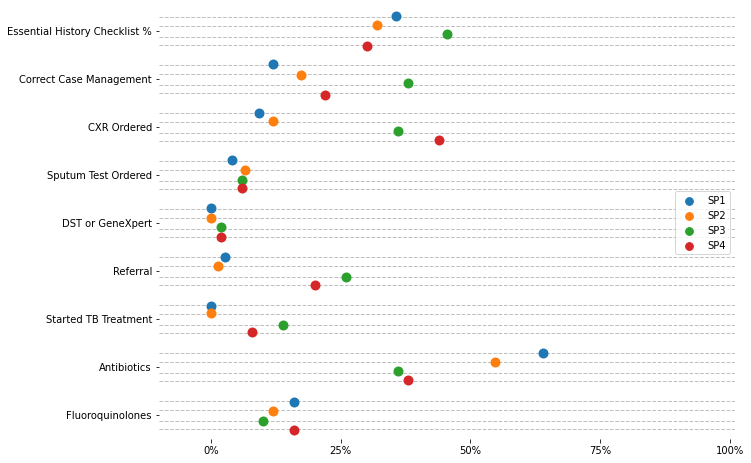

In [9]:
# Auxiliar module
import matplotlib.ticker as mtick

omit = ['right', 'top', 'bottom', 'left']
legend_label = ["SP1", "SP2", "SP3", "SP4"]

# Plot elements
fig = plt.figure(figsize=(8, 6), facecolor = "white")
ax = fig.add_axes([.1, 1, 1, 1])

# Dotplots
p = sns.stripplot(
    x="value100", y="key", data=data4, hue = "sp_case", size=10, dodge = True
    , jitter=.12
             )
# Line jitter
for i in range(len(set(data4.key))):
    jitter = .12
    j = [i - 2.4 * jitter, i - .9 * jitter, i + jitter, i + 2.4 * jitter]
    for line in j:
        plt.axhline(line, linestyle = "--", color = "#808080", alpha = .5, lw = 1)
        
# aesthetics
## No labels
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xlim(-10, 101)
## percet axis
p.xaxis.set_major_formatter(mtick.PercentFormatter()) # mticks
## breaks x axis by 25%
plt.xticks(np.arange(0, 101, 25))
p.spines[omit].set_visible(False)
## omit legend title
p.legend_.set_title("") 
## Update legend labels
for t, l in zip(p.legend_.texts, legend_label):
    t.set_text(l)
    
# plt.savefig("../figs/03scatter_04.png", bbox_inches='tight', dpi = 400)

## Polynomial

In [10]:
# Import data
data5 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/ScatterPolynomial.dta")
data5 = data5[data5.cons_pae_m_sine < 230]
data6 = data5[data5.cons_pae_m_sine < 230]

c:\python38\lib\site-packages\pandas\io\stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x1e279972df0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

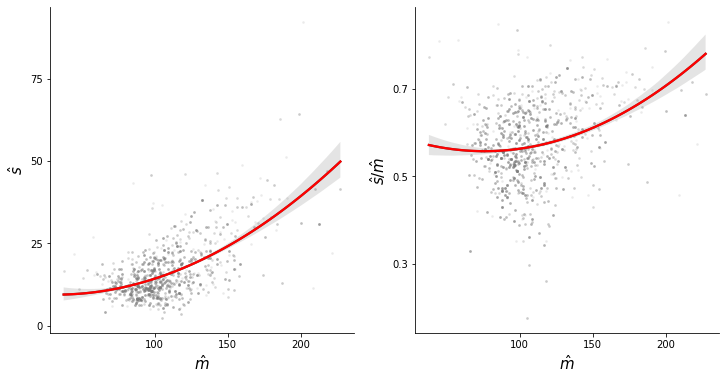

In [11]:
label_size = 15
omit = ['right', 'top']
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False, figsize=(12, 6), facecolor = "white")

fig.subplots_adjust(wspace = .2)

x_l, y_l = "cons_pae_m_sine", "cons_pae_sd_sine"
sns.regplot(x_l, y_l, data = data6, ax = ax1, scatter = False, order = 2, color = "#4f4d4b", ci = 95)
sns.regplot(x_l,"cv", data = data6, ax = ax2, scatter = False, order = 2, color = "#4f4d4b", ci = 95)
sns.regplot(x_l, y_l, data = data6, ax = ax1, scatter = False, order = 2, color = "red", ci = 0)
sns.regplot(x_l,"cv", data = data6, ax = ax2, scatter = False, order = 2, color = "red", ci = 0)
ax1.scatter(x_l, y_l, data = data6, alpha = .1, c = "#808080", s = 3)
ax2.scatter(x_l,"cv", data = data6, alpha = .1, c = "#808080", s = 3)

ax1.set_ylabel(r"$\hat{s}$", size = label_size)
ax1.set_xlabel(r"$\hat{m}$", size = label_size)
ax1.spines[omit].set_visible(False)

ax2.set_ylabel(r"$\hat{s}/\hat{m}$", size = label_size)
ax2.set_xlabel(r"$\hat{m}$", size = label_size)
ax2.spines[omit].set_visible(False)

plt.sca(ax1)
plt.xticks([100, 150, 200])
plt.yticks([0, 25, 50, 75])
plt.sca(ax2)
plt.xticks([100, 150, 200])
plt.yticks([.3, .5, .7])

# plt.savefig("../figs/03scatter_05.png", bbox_inches='tight')